# BARPLOTS - visualize a single row (gene)

Import packages:


*   https://numpy.org
*   https://pandas.pydata.org/about/index.html



In [ ]:
#import pandas
import pandas as pd
import numpy as np
df = pd.read_csv('https://code.omicslogic.com/assets/datasets/samples/Biology_Height_dataset.csv', sep=";")
df

,Unnamed: 0,Flower,Tree,Bird
0,Specimen 1,15.2,1700.9,28.9
1,Specimen 2,13.5,1800.0,23.3
2,Specimen 3,14.2,1300.6,27.5
3,Specimen 4,11.8,1500.0,27.6


load data:


*   https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt


Let's load a genomic, a transcriptomic and a metagenomic dataset

In [ ]:
#load data
GeneExpression = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt')

#preview data
GeneExpression.head()

,Id,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
0,class,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
1,a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
2,a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
3,a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
4,a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764


Each row represents a gene and each column represents a sample. This dataset is  taken from the cancer genome atlas (TCGA) with 2 cancer types - liver and breast (LIHC - hepatocellular carcinoma; BRCA - breast cancer)

In [ ]:
#Set index
GeneExpression.index = GeneExpression.Id

#clean up extra columns
GeneExpression = GeneExpression.drop(['class'], axis = 0) # axis sets row or column to drop {0 or ‘index’, 1 or ‘columns’}
GeneExpression = GeneExpression.drop(['Id'], axis = 1) 

#preview data
GeneExpression.head()

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
a10431,1561,1297,1423,1454,1125,2128,408.076,1360.8341,865.5358,978.4127,970.7569,770.3666


instead of checking the full dataset, sometimes it is useful to check the data type (what kind of data is this?). This can be important for various plotting techniques that require numeric data

In [ ]:
GeneExpression.dtypes

TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    object
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    object
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP    object
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT    object
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    object
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT    object
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    object
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    object
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    object
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    object
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    object
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT    object
dtype: object

As you can see, your data is an "object" which is a generic data type that combines multiple types of data: numbers and strings. In order to plot this kind of data, we need to convert it to numeric. To check that each gene (row) is an object, we can use the pandas `dtype` function. Let's do that for a gene that is known to be amplified in breast cancer, ERBB2 (http://www.cancerindex.org/geneweb/ERBB2.htm)

In [ ]:
Gene1 = GeneExpression.loc['ERBB2|2064']
Gene1.dtypes

dtype('O')

In order to look at the data visually, we need to convert the data to numeric and make a bar plot. 

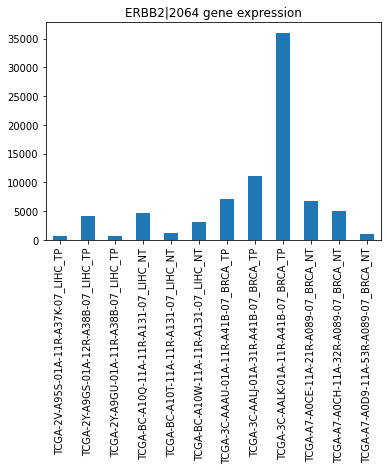

In [ ]:
pd.to_numeric(Gene1, errors='coerce').convert_dtypes().plot.bar(rot=90, title="ERBB2|2064 gene expression")

As you can see, the gene is overexpressed in tumor samples from breast patients (BRCA_TP). Since variation between 35,000 and 1000 is quite large, let's see the data in logarithmic scale. This can be a way for us to understand whether the variation is consistent between groups of samples.

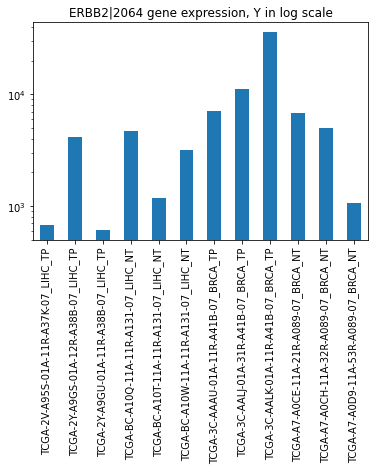

In [ ]:
#convert data to numeric
Gene1 = pd.to_numeric(Gene1, errors='coerce').convert_dtypes()

#plot a bar plot for this gene with logarithmic y scale
Gene1.plot.bar(rot=90, logy=True, title="ERBB2|2064 gene expression, Y in log scale")

THis plot gives us new insights about the ERBB gene - specifically, we can see that in Breast cancer, it is somewhat up-regulated, but in lung cancer it is also impacted, but the opposite direction - it is downregulated! We can see that because 2 out of 3 samples from tumor have a significantly lower expression than the normal samples. In order to explore this further, let's try to use an average between groups of samples.

# Box Plots - summarize data
(typically used to summarize several datapoints by group to understand key statistical properties)

In [ ]:
#load the full table
GeneExpression1 = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt', header=None)

#set the column names and row names
GeneExpression1.columns = GeneExpression1.iloc[0]
GeneExpression1.index = GeneExpression1.Id

#remove duplicate ID row and column
GeneExpression1 = GeneExpression1.drop(index='Id')
GeneExpression1 = GeneExpression1.drop(['Id'], axis = 1) 

#change gene names to not include the problematic | sign
GeneExpression1.index=GeneExpression1.index.str.replace('|','_')

GeneExpression1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
class,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869,10756,3708,2799,1661,4915,3507.2482,5458.7489,5691.3529,6455.873,6038.9281,2344.7047
ZZEF1_23140,1366,1533,1606,493,320,638,1894.9342,942.883,781.1336,1314.2857,1477.386,1997.9633
ZZZ3_26009,783,1746,412,486,694,482,1180.4565,509.5195,700.8688,968.254,620.9685,730.6517


In [ ]:
#fix the problematic "class" label
GeneExpression1 = GeneExpression1.rename(index={'class':'Group'})

#transpose the data frame
GeneExpression1 = GeneExpression1.transpose()

#make sure the data is numeric
GeneExpression1 = GeneExpression1.apply(pd.to_numeric, errors="ignore")

#check the data
GeneExpression1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
Group,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.297,143.864,78.9238,53.638,87.5764
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869,10756,3708,2799,1661,4915,3507.25,5458.75,5691.35,6455.87,6038.93,2344.7
ZZEF1_23140,1366,1533,1606,493,320,638,1894.93,942.883,781.134,1314.29,1477.39,1997.96
ZZZ3_26009,783,1746,412,486,694,482,1180.46,509.519,700.869,968.254,620.968,730.652


After the critical preparation of the data (note that we have transposed the data, making both columns available for easy calling by column name), it is easy to plot the data and explore variation across samples and conditions:



*   NT - normal tissue
*   TP - primary solid tumor 
*   LIHC - liver cancer (hepatocellular carcinoma)
*   BRCA - breast cancer

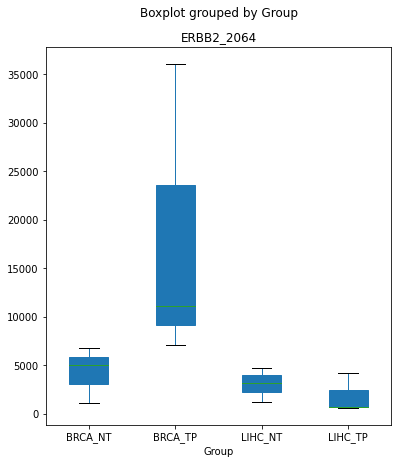

In [ ]:
#make the boxplot for a gene
GeneExpression1.boxplot(column='ERBB2_2064', by='Group', grid=False, figsize=(6, 7), patch_artist=True)

In [ ]:
GeneExpression1.ERBB2_2064.plot.bar(logy=True, title="ERBB2_2064 Expression - Bar Plot, Y in log scale", figsize=(15, 7))

In [ ]:
#make the boxplot for a gene
GeneExpression1.boxplot(column='CNDP1_84735', by='Group', grid=False, figsize=(15, 7), patch_artist=True)

In [ ]:
GeneExpression1.CNDP1_84735.plot.bar(logy=True, title="CNDP1_84735 Bar Plot", figsize=(15, 7))

combine both genes together:

In [ ]:
Genes = GeneExpression1[['CNDP1_84735','ERBB2_2064']]
Genes.plot.bar(logy=True, figsize=(15, 7))

However, the level of expression between these genes varies - what can you say about the significance of each gene? How would you compare them? Use words like **"specificity"** and **"accuracy"** to describe each one

In [ ]:
Genes.plot.bar(subplots=True, figsize=(15, 7))

# Density Plots

In [ ]:
GeneExpression1.groupby(['Group']).CNDP1_84735.plot.kde(legend=True)

In [ ]:
GeneExpression1.groupby(['Group']).ERBB2_2064.plot.kde(legend=True)

In [ ]:
#make the boxplot for a gene
GeneExpression1.boxplot(column=['CNDP1_84735','ERBB2_2064'], by='Group', layout=(2,1), grid=False, figsize=(15, 7), patch_artist=True)

# Statistical Test Example: T-Test

In [ ]:
#to use t-test, we need to install a package called "researchpy"
!pip install researchpy

In [ ]:
#load packages
import researchpy as rp
import scipy.stats as stats

In [ ]:
#run t-test statistics (INDEPDENT T-TEST USING RESEARCHPY)
result, summary = rp.ttest(group1 = GeneExpression1['ERBB2_2064'][GeneExpression1['Group'] == 'BRCA_NT'], group1_name = "BRCA_NT",
         group2 = GeneExpression1['ERBB2_2064'][GeneExpression1['Group'] == 'BRCA_TP'], group2_name = "BRCA_TP")

print(summary)

In [ ]:
#run a more simple t-test (INDEPDENT T-TEST USING SCIPY.STATS)
stats.ttest_ind(GeneExpression1['ERBB2_2064'][GeneExpression1['Group'] == 'BRCA_NT'], GeneExpression1['ERBB2_2064'][GeneExpression1['Group'] == 'BRCA_TP'])

In [ ]:
result, summary = rp.ttest(group1 = GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'LIHC_NT'], group1_name = "LIHC_NT",
         group2 = GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'LIHC_TP'], group2_name = "LIHC_TP")
print(summary)

In [ ]:
#run t-test for CNDP1 gene for the LIHC samples
stats.ttest_ind(GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'LIHC_NT'], GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'LIHC_TP'])

In [ ]:
#run t-test for CNDP1 gene for the BRCA samples
stats.ttest_ind(GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'BRCA_NT'], GeneExpression1['CNDP1_84735'][GeneExpression1['Group'] == 'BRCA_TP'])

# Next Steps: Assignment
1. perform T-test for all rows in this table
2. Select only rows with a "good" p-value
3. determine log fold change for each row (fold = mean of group 1 divided by mean of group 2; or if in log scale, mean of g1-mean of g2)
4. prepare a dataframe of genes that are statistically significant and biologically meaningful in gene expression difference between groups
5. prepare a summary - how many are significant, how many are up and/or down regulated in each condition; what are some genes that stood out? 